Basics of Probability

Write a Python program to simulate the following scenarios:
a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.
b. Rolling two dice and computing the probability of getting a sum of 7.

***Steps ***
a. Use Python's random module for simulations.
b. Implement loops for repeated trials.
c. Track outcomes and compute probabilities.

In [1]:
import random

# Function to simulate coin toss
def simulate_coin_toss(num_tosses):

    heads = 0
    tails = 0
    for _ in range(num_tosses): #_ is used instead of variable to indicate that the loop variable is not going to be used inside the loop.
        '''
        if random.random() < 0.5:  # Generate random between 0 and 1, if < 0.5 consider head
            heads += 1
        else:
            tails += 1
        '''
        # Randomly choose between 0 (heads) and 1 (tails)
        outcome = random.choice(['Heads', 'Tails'])
        if outcome == 'Heads':
            heads += 1
        else:
            tails += 1
    # Calculate experimental probabilities
    prob_heads = heads / num_tosses
    prob_tails = tails / num_tosses

    # Calculation of experimental probabilities
    print(f"Coin Toss simulation results with {num_tosses} toss")
    print(f"Heads probability: {prob_heads:.4f}")
    print(f"Tails probability: {prob_tails:.4f}")

# Function to simulate rolling two dice
def simulate_dice_rolls(num_rolls):

    count_seven = 0
    for _ in range(num_rolls):
        #Rolling two dice
        dice1 = random.randint(1, 6) # Generate random integer between 1 and 6 both inclusive
        dice2 = random.randint(1, 6)
        total = dice1 + dice2

        if total == 7:
            count_seven += 1

    # Calculate experimental probability of getting a sum of 7
    prob_seven = count_seven / num_rolls

    print(f"Dice Rolls simulation results with {num_rolls} rolls")
    print(f"Probability of Sum 7: {prob_seven:.4f}")

# Running the simulations
simulate_coin_toss(10000)
simulate_dice_rolls(10000)

Coin Toss simulation results with 10000 toss
Heads probability: 0.4951
Tails probability: 0.5049
Dice Rolls simulation results with 10000 rolls
Probability of Sum 7: 0.1697


***Write*** a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.

Steps a. Simulate rolling a die 10 times using a loop. b. Track trials where at least one "6" occurs. c. Calculate the proportion of successful trials.

In [2]:
import random

# Function to estimates the probability of at least one 6 in 10 dice rolls
def estimate_probability(num_trials=10000):
    success_count = 0  # To count the number of successful trials

    for _ in range(num_trials):
        # Simulate rolling a die 10 times
        rolls = [random.randint(1, 6) for _ in range(10)]

        # Check if at least one "6" is rolled
        if 6 in rolls:
            success_count += 1

    # Calculate the proportion of successful trials
    probability = success_count / num_trials
    return probability

# Estimate the probability with 10,000 trials
probability_estimate = estimate_probability()
print(f"Estimated Probability of rolling at least one '6' in 10 rolls: {probability_estimate:.4f}")

Estimated Probability of rolling at least one '6' in 10 rolls: 0.8410


Conditional Probability and Bayes' Theorem

3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate: a. The probability of drawing a red ball given that the previous ball was blue. b. Verify Bayes' theorem with the simulation results.

Steps a. Use random sampling to simulate the process. b. Compute conditional probabilities directly from the data.

In [3]:
import random

def simulate_ball_draws(num_draws):
    """Simulates drawing balls from a bag and calculates probabilities."""
    bag = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8 # create the bag of balls
    draws = []
    for _ in range(num_draws):
      ball = random.choice(bag) # Randomly draw ball from bag
      draws.append(ball)

    # Calculate P(Red|Previous Blue)
    red_given_blue_count = 0
    for i in range (1,len(draws)):
      if draws[i] == 'red' and draws[i-1] == 'blue':
         red_given_blue_count +=1

    count_previous_blue = draws.count('blue')
    prob_red_given_blue = red_given_blue_count/(count_previous_blue if count_previous_blue > 0 else 1)

    # Calculate P(Blue)
    prob_blue = draws.count('blue') / num_draws

    #Calculate P(red)
    prob_red = draws.count('red') / num_draws

    # Calculate P(Blue|Red) to verify bayes theorem
    blue_given_red_count = 0
    for i in range (1,len(draws)):
      if draws[i] == 'blue' and draws[i-1] == 'red':
         blue_given_red_count +=1
    prob_blue_given_red = blue_given_red_count/(draws.count('red') if draws.count('red') > 0 else 1 )

    print("Ball Draw simulation results with " + str(num_draws) + " draws")
    print(f"P(Red | Previous Blue): {prob_red_given_blue}") # calculate P(Red | Previous Blue)
    print(f"P(Blue | Red): {prob_blue_given_red}") # calculate P(Blue | Red)

    print(f"Verifying Bayes theorem P(Blue) * P(Red|Blue) should be approximately P(Red) * P(Blue|Red)")
    print(f"P(Blue) * P(Red|Blue)  = {prob_blue*prob_red_given_blue}")
    print(f"P(Red) * P(Blue|Red)  = {prob_red * prob_blue_given_red}")

simulate_ball_draws(1000)

Ball Draw simulation results with 1000 draws
P(Red | Previous Blue): 0.21761658031088082
P(Blue | Red): 0.3784860557768924
Verifying Bayes theorem P(Blue) * P(Red|Blue) should be approximately P(Red) * P(Blue|Red)
P(Blue) * P(Red|Blue)  = 0.084
P(Red) * P(Blue|Red)  = 0.095


Random Variables and Discrete Probability


4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  
  Compute the empirical mean, variance, and standard deviation of the sample.  
  Steps  
      a. Use numpy.random.choice() to generate the sample.  
      b. Use numpy methods to calculate mean, variance, and standard deviation.


In [8]:
import numpy as np

def discrete_random_variable(size=1000):
    values = [1, 2, 3]
    probabilities = [0.25, 0.35, 0.4]
    sample = np.random.choice(values, size=size, p=probabilities)

    mean = np.mean(sample)
    variance = np.var(sample)
    std_dev = np.std(sample)

    print(f"Mean is: {mean:.4f}")
    print(f"Variance: {variance:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")

discrete_random_variable()

Mean is: 2.1250
Variance: 0.6694
Standard Deviation: 0.8182


Continuous Random Variables


5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
  a. A histogram.  
  b. A probability density function (PDF) overlay.  
  Steps  
      a. Use numpy.random.exponential().  
      b. Use matplotlib to create visualizations.


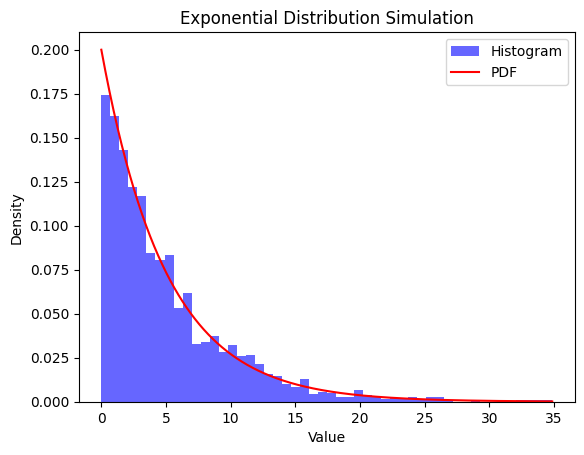

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_distribution_simulation(size=2000, mean=5):
    scale = mean  # Scale parameter for numpy's exponential function
    sample = np.random.exponential(scale, size)

    # Plot histogram
    plt.hist(sample, bins=50, density=True, alpha=0.6, color='b', label='Histogram')

    # Overlay Probability Density Function (PDF)
    x = np.linspace(0, max(sample), 1000)
    pdf = (1/scale) * np.exp(-x/scale)
    plt.plot(x, pdf, 'r', label='PDF')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Exponential Distribution Simulation')
    plt.legend()
    plt.show()

exponential_distribution_simulation()

Central Limit Theorem


6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means.  
  Steps  
      a. Use numpy.random.uniform().  
      b. Plot both the uniform distribution and the sample mean distribution for comparison.


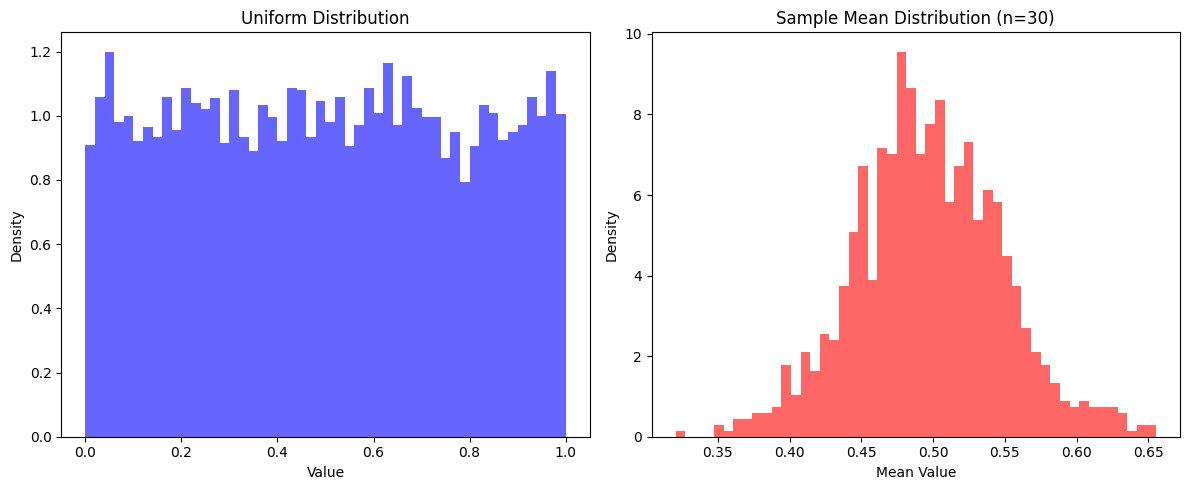

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def central_limit_theorem_simulation(num_samples=1000, sample_size=30):
    uniform_data = np.random.uniform(0, 1, 10000)
    sample_means = [np.mean(np.random.choice(uniform_data, sample_size)) for _ in range(num_samples)]

    # Plot original uniform distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(uniform_data, bins=50, color='blue', alpha=0.6, density=True)
    plt.title("Uniform Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")

    # Plot sample mean distribution
    plt.subplot(1, 2, 2)
    plt.hist(sample_means, bins=50, color='red', alpha=0.6, density=True)
    plt.title("Sample Mean Distribution (n=30)")
    plt.xlabel("Mean Value")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

central_limit_theorem_simulation()